# Coulomb Stopping Powers in a WD 

In [1]:
# %matplotlib nbagg
%matplotlib inline

import time 

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,20]

import stoppingpower as sp

In [2]:
def momentum_threshold(p_target, M_incident):
    """ The minimum incident momentum at which the low-energy PR estimate is valid """
    return (p_target**2)/(2*M_incident)

In [16]:
Z_carbon = 6.0
A_carbon = 12.0
# n_elec = Z_carbon*(10.0**np.array([30.0, 31.0, 32.0])) # cm^{-3}
n_elec = Z_carbon*np.array([10**32.0, 10**40]) # cm^{-3}
m_proton = 940.0 # MeV
m_electron = 0.5 # Mev
m_pion = 140.0 # MeV

In [24]:
# incidents = ["carbon", "pion", "proton", "electron"]
# masses = {"carbon":A_carbon*m_proton, "pion":m_pion, "proton":m_proton, "electron":m_electron}
# charges = {"carbon":Z_carbon, "pion":1.0, "proton":1.0, "electron":1.0}
# samples = 10**3

incidents = ["carbon"]
masses = {"carbon":A_carbon*m_proton}
charges = {"carbon":Z_carbon}
samples = 10**5

density: 6e+32 cm^(-3)
p_fermi: 32.35 MeV
    calculating carbon stopping power...
    .... finished in 4.218 minutes
density: 6e+40 cm^(-3)
p_fermi: 15016.11 MeV
    calculating carbon stopping power...
    .... finished in 3.802 minutes


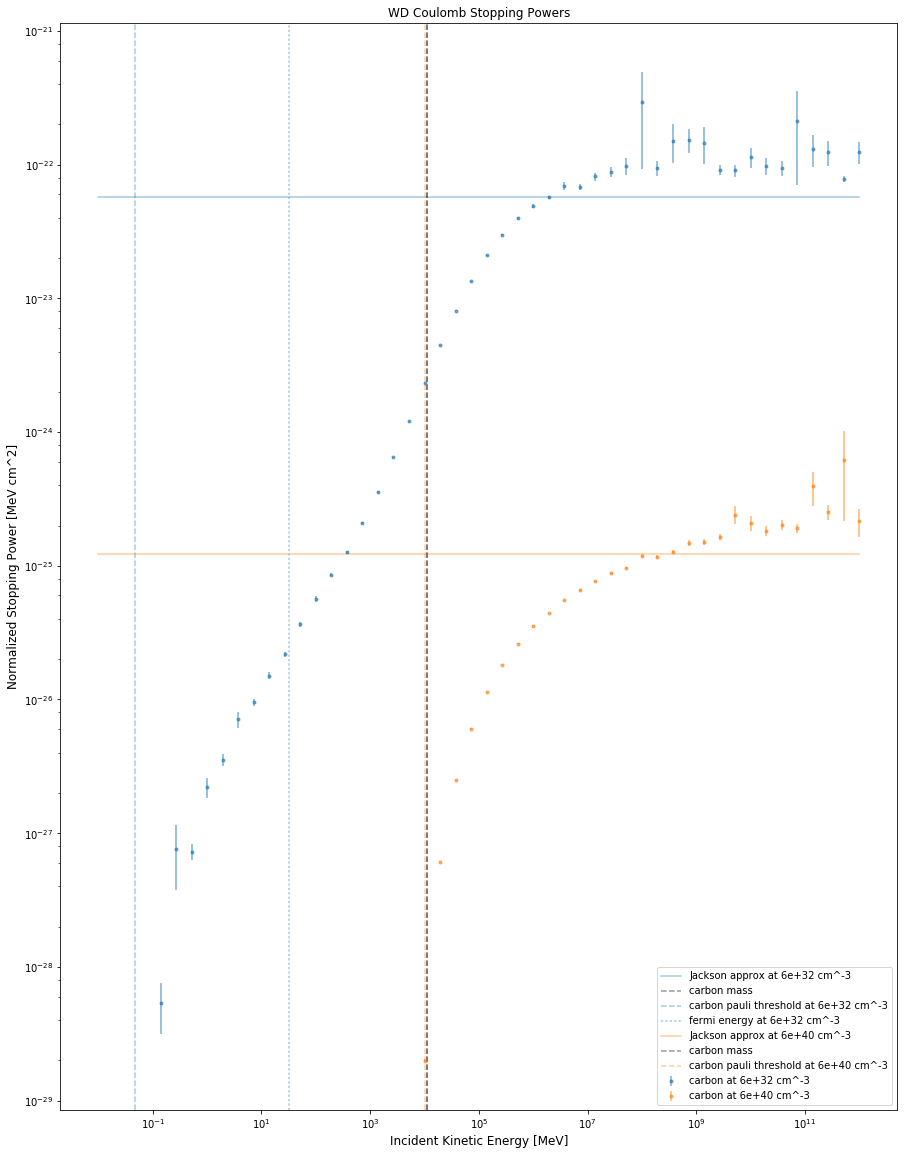

In [25]:
ke = np.logspace(-2, 12, 50)  # 100 samples log-spaced between 10^-4 and 10^9
fig, ax = plt.subplots()
for n_index, n0 in enumerate(n_elec):
    wd = sp.FermiSea_StoppingPower(m=m_electron, n0=n0, 
                                   masstolength=sp.MeV_to_InvCM)
    print "density: {} cm^(-3)".format(n0)
    print "p_fermi: {:.2f} MeV".format(wd.pfermi)
    
    for incident in incidents:
        dedx_func = wd.get_ion_coulomb_stopping_power(masses[incident], charges[incident])
        dedx_jackson_func = wd.high_density_fast_ion(masses[incident], charges[incident])
        print "    calculating {} stopping power...".format(incident)
        t0 = time.time()
        dedx, dedx_error = dedx_func(ke, important=True, samples=samples)
        elapsed = (time.time() - t0)/60.0
        print "    .... finished in {:.3f} minutes".format(elapsed)
        dedx_plot = ax.errorbar(ke, dedx/n0, yerr=dedx_error/n0, alpha=0.6, marker='.', 
                                linestyle='', label="{} at {} cm^-3".format(incident, n0))
        current_color = dedx_plot[0].get_color()
        ax.plot(ke, dedx_jackson_func(ke)/n0, alpha=0.4, marker='', color=current_color,
                linestyle='-', label="Jackson approx at {} cm^-3".format(n0))
        ax.axvline(masses[incident], linestyle='--', color='k', 
                   alpha=0.4, label="{} mass".format(incident))
        ax.axvline(momentum_threshold(wd.pfermi, masses[incident]), linestyle='--', alpha=0.4,
                   color=current_color, label="{} pauli threshold at {} cm^-3".format(incident, n0))
    if n_index == (len(incidents)-1):
        ax.axvline(wd.Efermi, linestyle=':', alpha=0.4, color=current_color, label="fermi energy at {} cm^-3".format(n0))
        ax.set_title("WD Coulomb Stopping Powers", fontsize=12)
        ax.set_xlabel("Incident Kinetic Energy [MeV]", fontsize=12)
        ax.set_ylabel("Normalized Stopping Power [MeV cm^2]", fontsize=12)
        ax.set_xscale("log")
        ax.set_yscale("log")
ax.legend(loc="best")